# <p align = 'center'>Heart Disease Prediction</p>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

The dataset is collected from <a href = "https://archive.ics.uci.edu/ml/datasets/Heart+Disease">UCI Repository</a>

## Data Description:
* age in years
* sex (1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol
serum cholestoral in mg/dl
* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg
resting electrocardiographic results
* thalach
maximum heart rate achieved
* exang
exercise induced angina (1 = yes; 0 = no)
* oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
-- Value 1: upsloping<br>
-- Value 2: flat<br>
-- Value 3: downsloping <br>
* ca
number of major vessels (0-3) colored by flourosopy
* thal
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
* target
1 or 0

# Table of contents
1. Importing Libraries and other dependencies
2. Data Analysis (EDA)
3. Data Visualization
4. Data Pre-processing
5. Modeling (Machine Learning)
6. Performance Evaluation
7. Conclusion

## 1. Importing Libraries and Other Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [56]:
url = '/Users/adityaagarwal/Library/CloudStorage/OneDrive-NortheasternUniversity/Jupyter Notebook/Projects/Prediction-and-Diagnosis-of-Heart-Disease-in-Patients/data/heart_disease_dataset.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Data Analysis (EDA)

In [4]:
# Getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Checking and handling `Null Values` if there are any

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

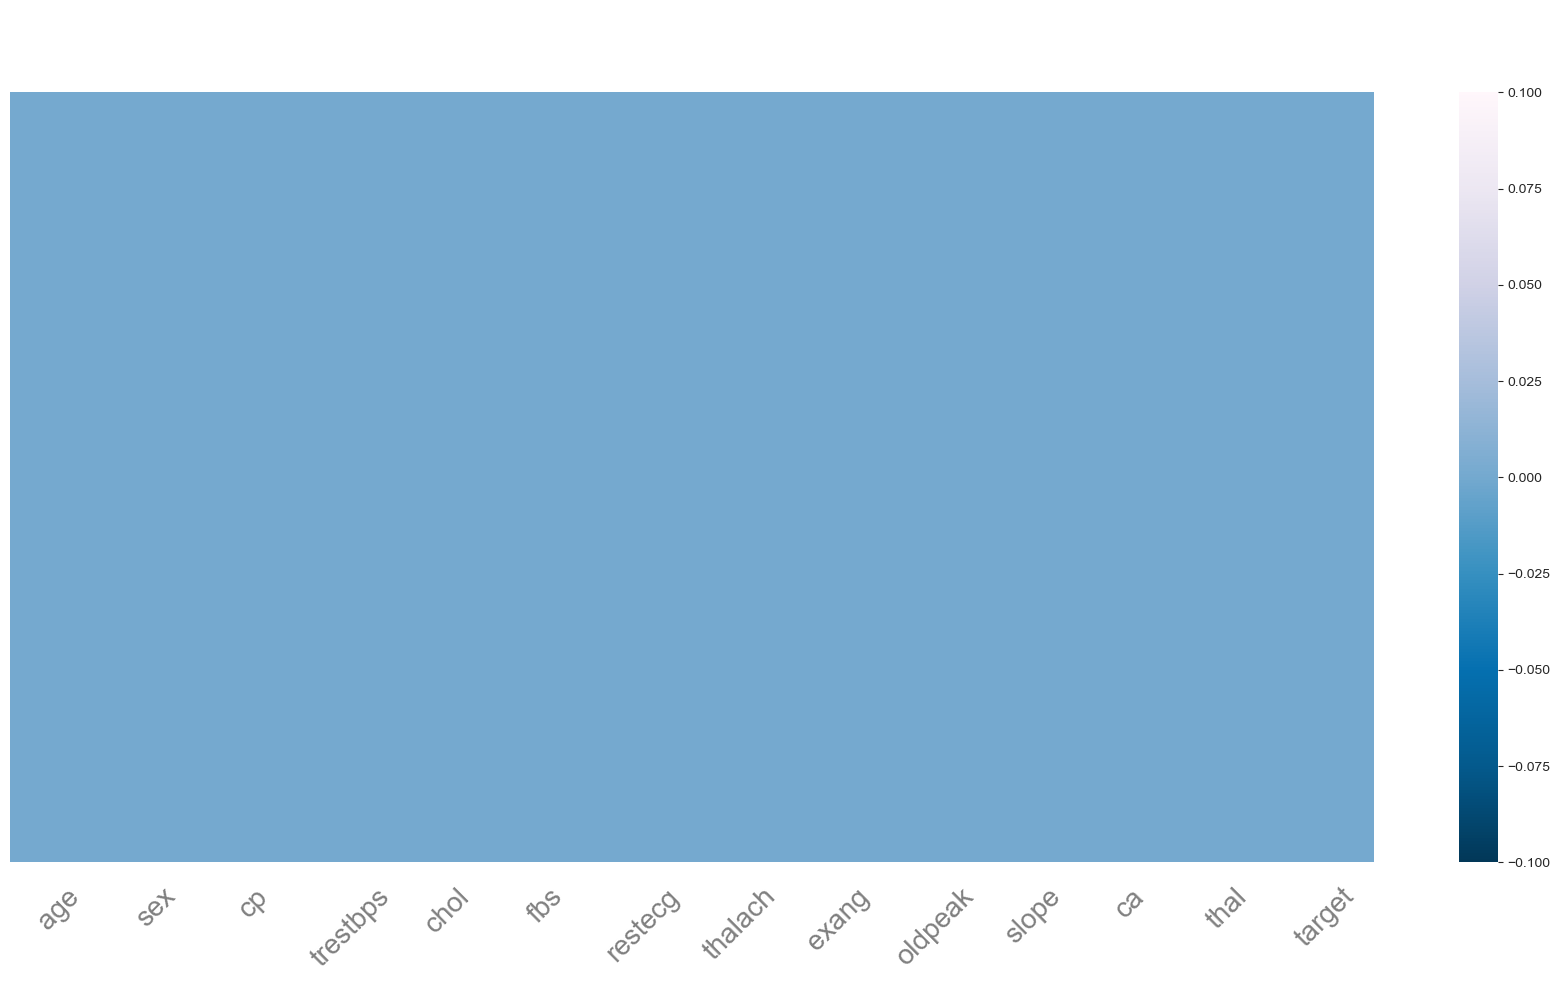

In [6]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey', rotation = 45)
plt.tick_params(size=12,color='white')

plt.title('Finding Null Values Using Heatmap\n', color='white',size=30)

sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='PuBu_r')

From the heatmap we can understand that there are "no Null values"

## 3. Data Visualizaiton

In [7]:
# Creating a copy of original dataset
df2 = df.copy()

#### 1. Countplot

In [8]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

# Applying the function for "Sex" column
df2['sex'] = df2['sex'].apply(chng)

In [9]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'

# Applying the function for Target function
df2['target'] = df2['target'].apply(chng2)

<AxesSubplot:xlabel='sex', ylabel='count'>

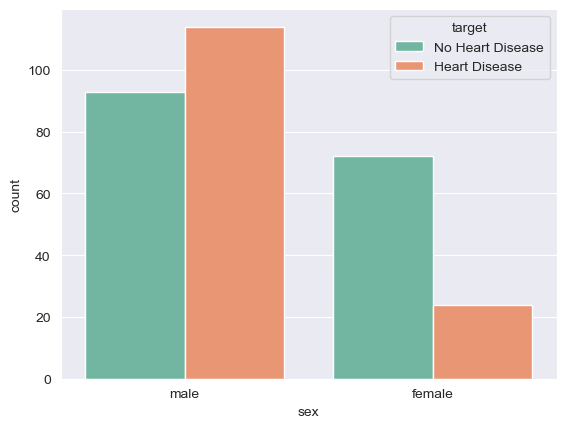

In [14]:
sns.countplot(data = df2, x = 'sex', hue = 'target')dd

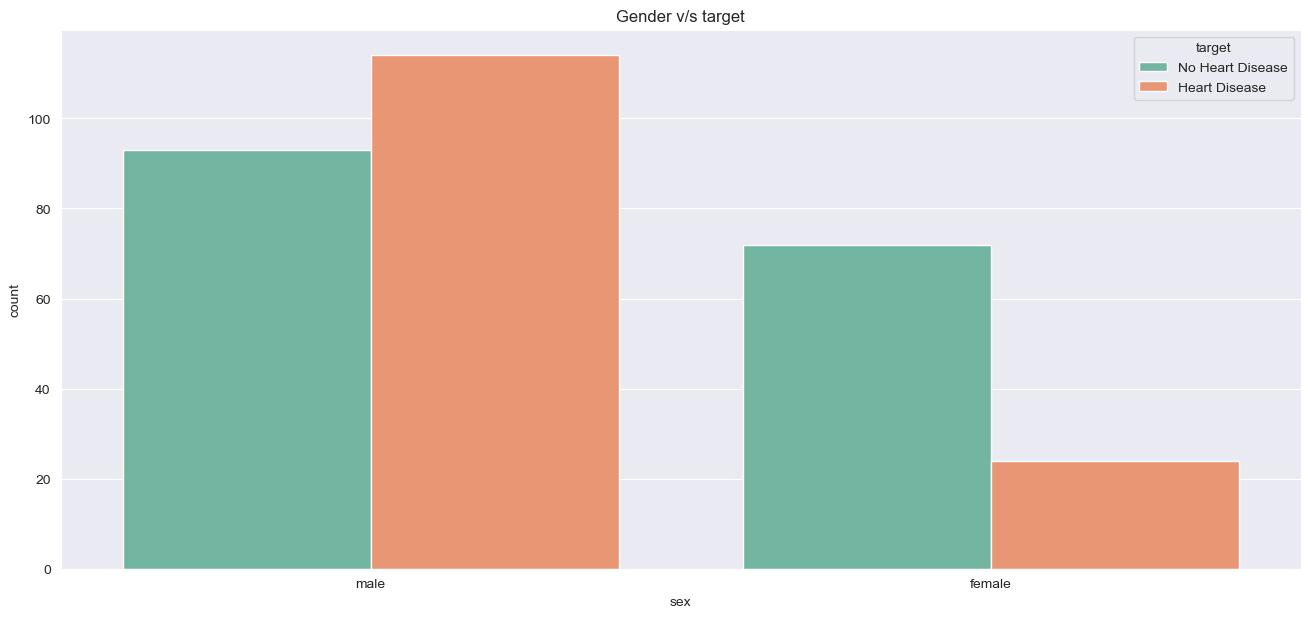

In [23]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='sex', hue='target')
plt.title('Gender v/s target')
plt.savefig("Images/GenderVsTarget.png")

**Generally, Males have more chances of having heart disease than Females**

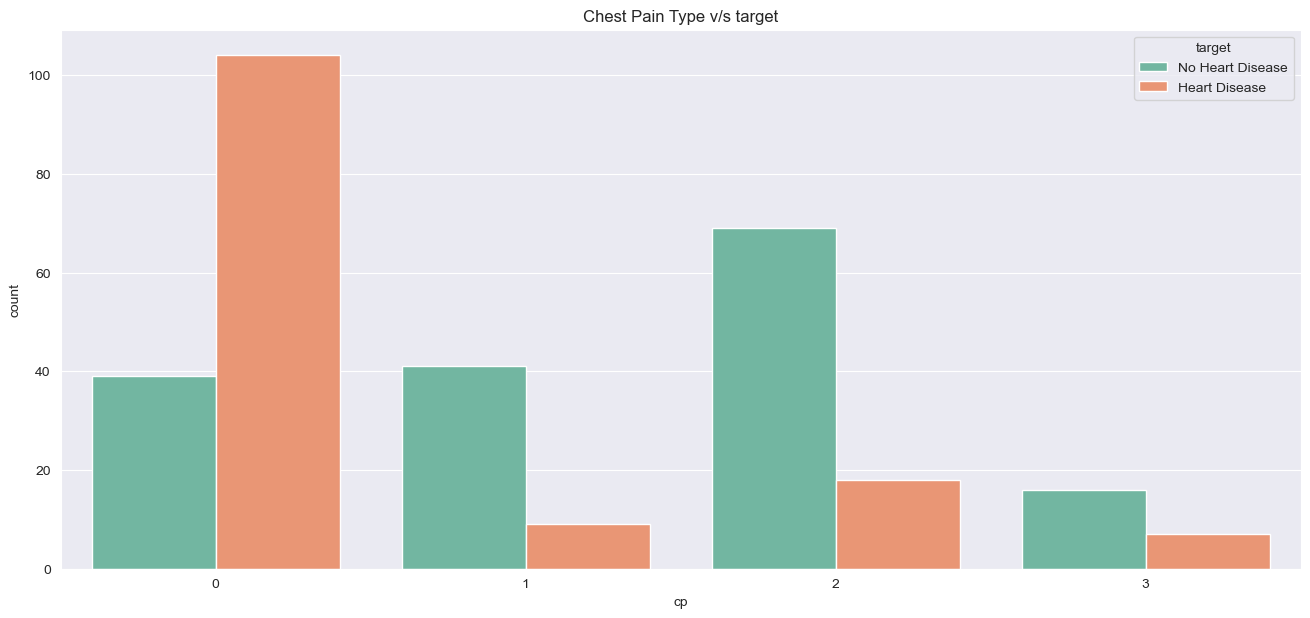

In [20]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='cp', hue='target')
plt.title('Chest Pain Type v/s target')
plt.savefig("Images/CPvstarget.png")

**It is seen that Paitents with CP type 0 have more chances of having Heart disease than type 1,2,3. It is also seen that paitents with Type 2 have more chances of not having Heart Disease**

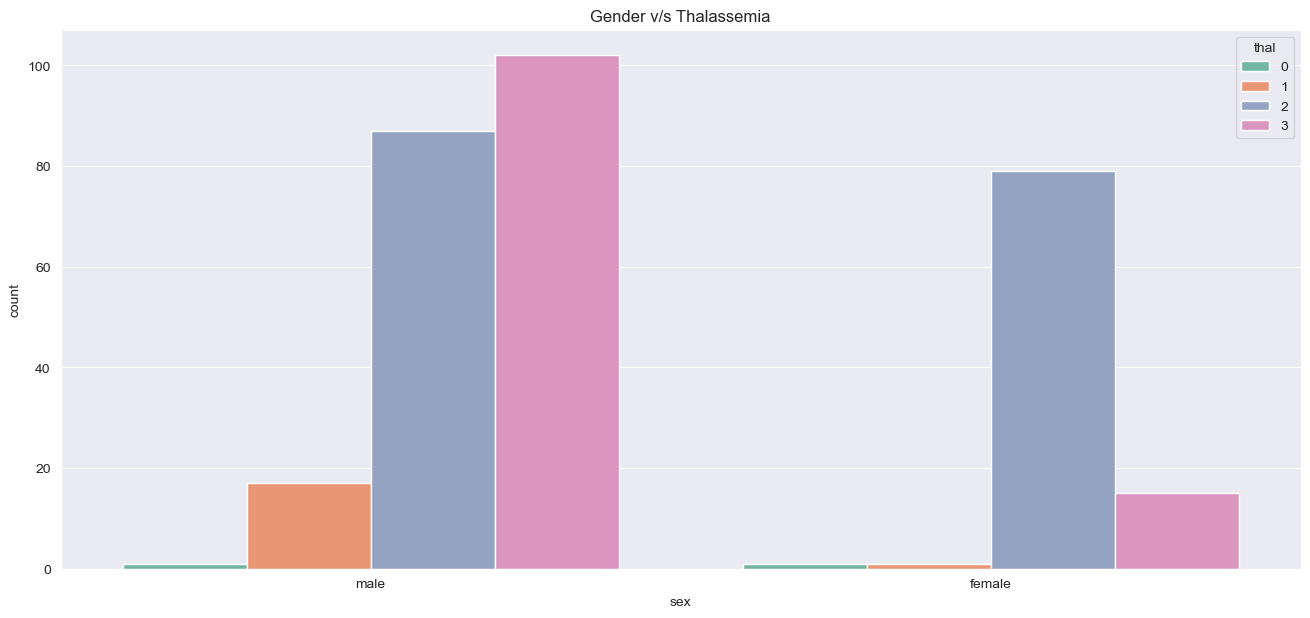

In [19]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia')
plt.savefig("Images/GenderVsThal.png")

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen.
<BR>
**It is seen that, MALE paitents have thal type 3 more than FEMALES.**

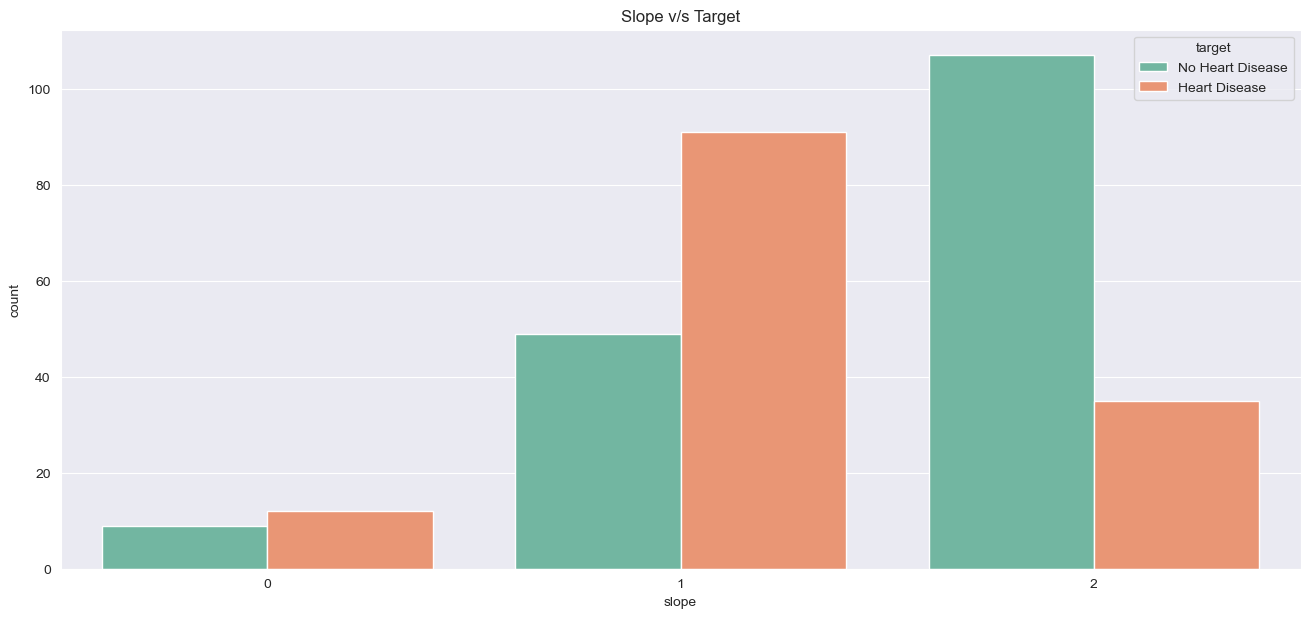

In [17]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target')
plt.savefig('Images/slopeVstarget.png')

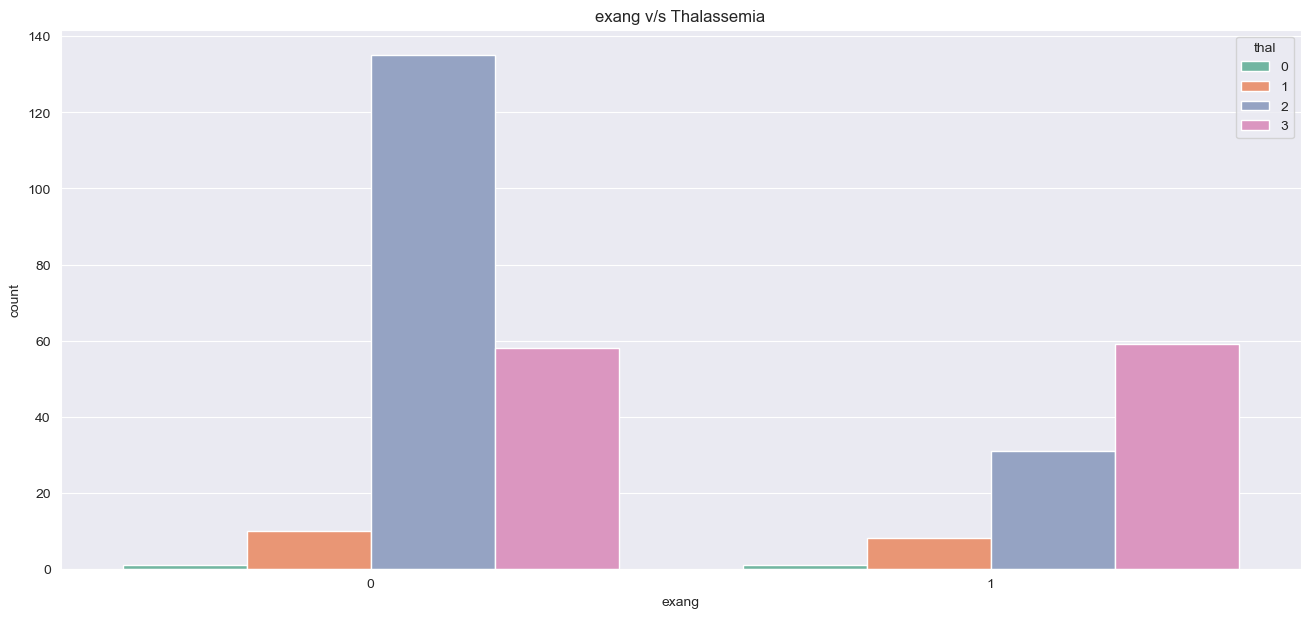

In [22]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia')
plt.savefig("Images/ExangVsThal.png")

#### 2. Distplot

In [24]:
# Age of Patients having heart disease
age_tar_0 = df[df['target']==0]['age']

Text(0.5, 1.0, 'Normal Distribution of Age of Heart Diseased Patients')

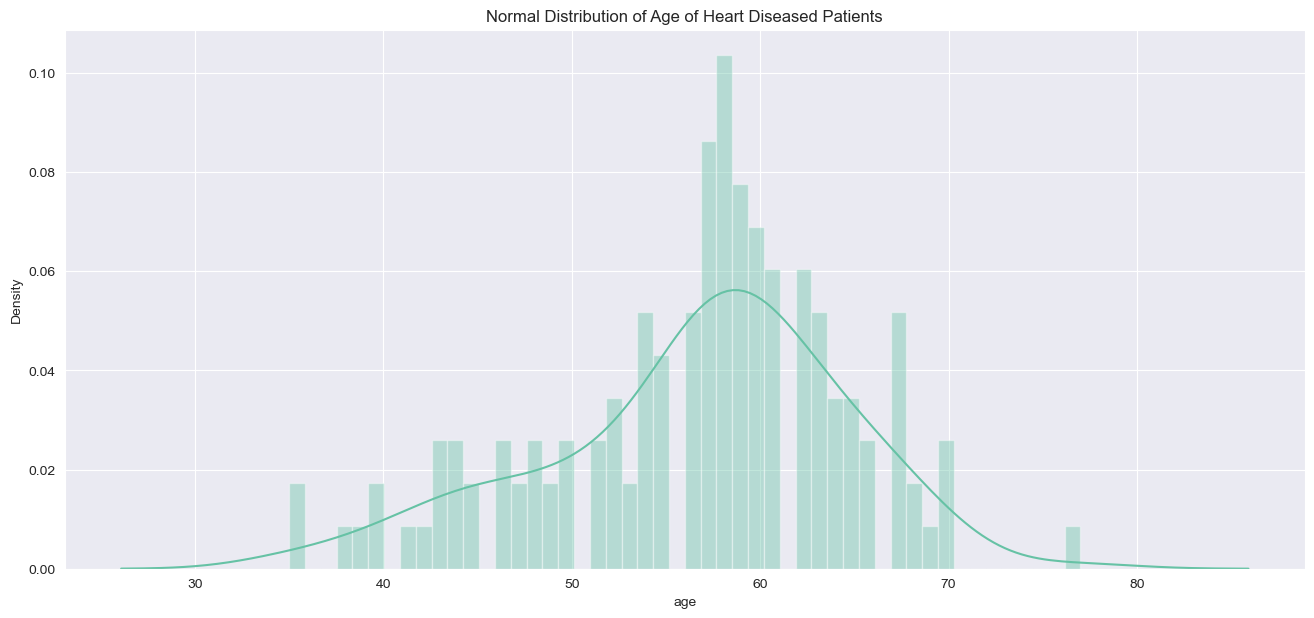

In [25]:
plt.figure(figsize=(16,7))
sns.distplot(age_tar_0, kde=True, bins=50)
plt.title('Normal Distribution of Age of Heart Diseased Patients')

In [35]:
# Chol level for patients with heart disease
chol_tar_0 = df[df['target']==0]['chol']

Text(0.5, 1.0, 'Normal Distribution for Chol of Heart Diseased Patients')

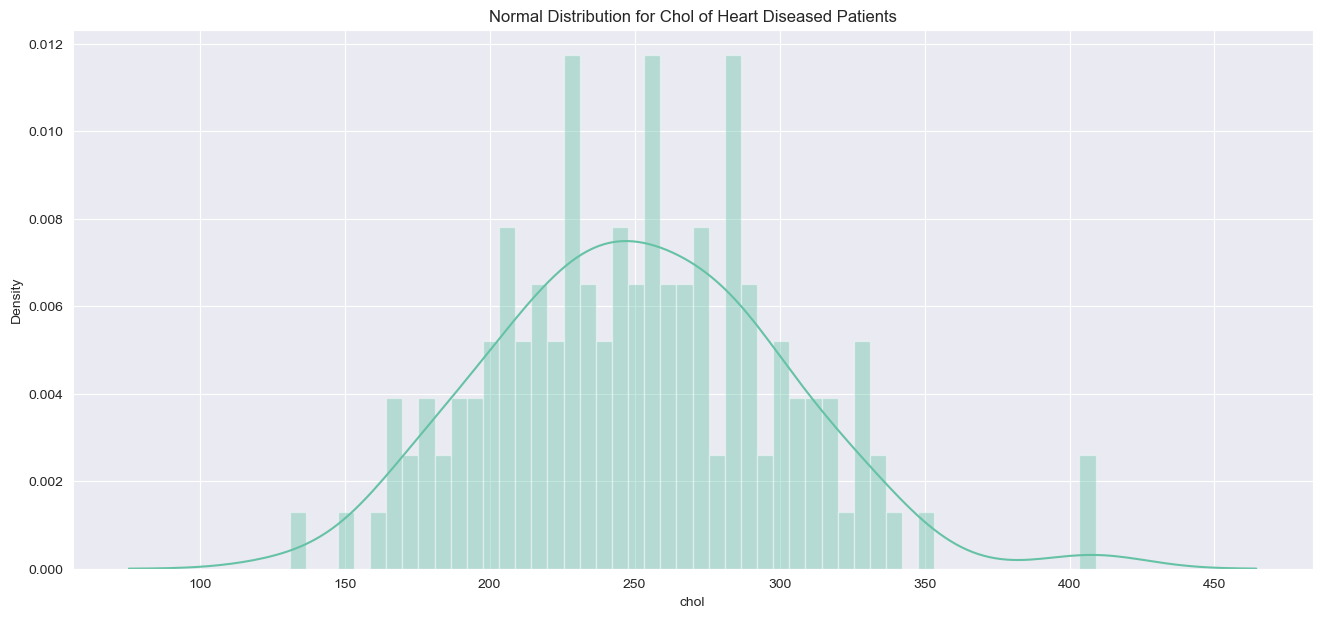

In [36]:
# Chol level of the patients
plt.figure(figsize=(16,7))
sns.distplot(chol_tar_0, kde=True, bins=50)
plt.title('Normal Distribution for Chol of Heart Diseased Patients')

In [39]:
# Thalach level for patients with heart disease
Thalach_tar_0 = df[df['target']==0]['thal']

Text(0.5, 1.0, 'thalach of Heart Diseased Patients')

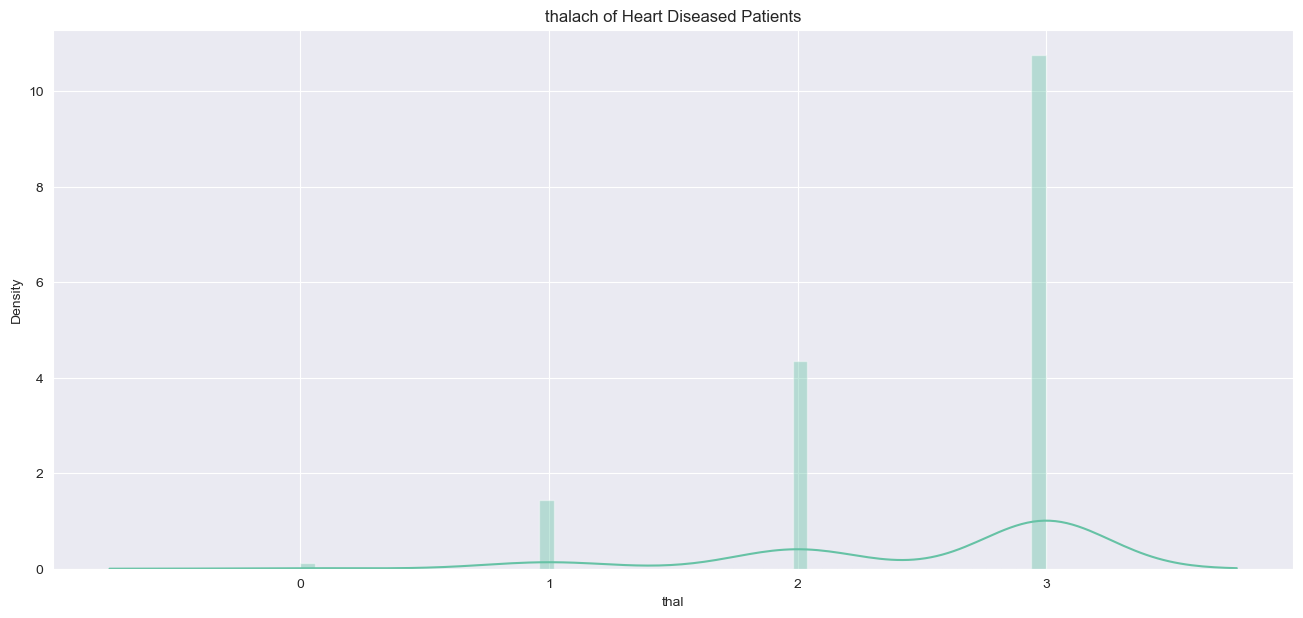

In [40]:
plt.figure(figsize=(16,7))
sns.distplot(Thalach_tar_0,kde=True, bins=50)
plt.title('thalach of Heart Diseased Patients')

#### 3. Jointplot

In [43]:
# Selecting all patients having heart disease
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


Age vs trestbps(Heart Diseased Patinets)


<Figure size 2000x1000 with 0 Axes>

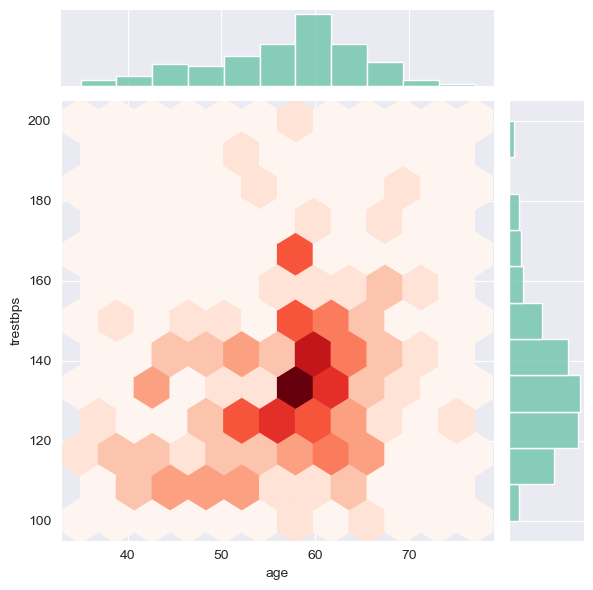

<Figure size 640x480 with 0 Axes>

In [44]:
pal = sns.light_palette("blue", as_cmap=True)
plt.figure(figsize=(20,10))
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3, x='age',  y='trestbps',  kind='hex',  cmap='Reds')
plt.show()
plt.savefig("Images/AgeVstrestbps.png")

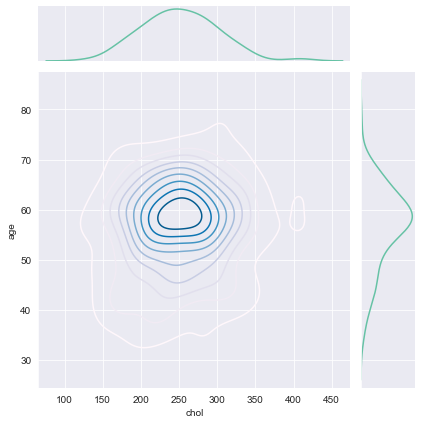

In [65]:
sns.jointplot(data=df3, x='chol', y='age', kind='kde', cmap='PuBu')

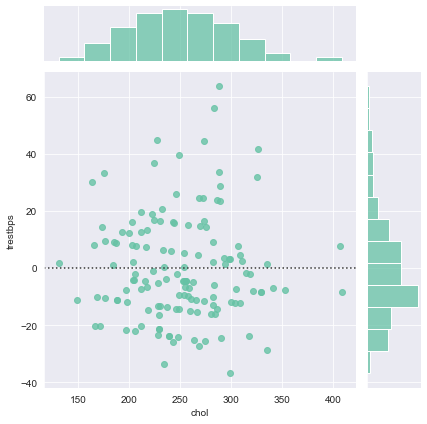

In [66]:
sns.jointplot(data=df3, x='chol',  y='trestbps',  kind='resid')

####  4. Boxplot

<AxesSubplot:xlabel='target', ylabel='age'>

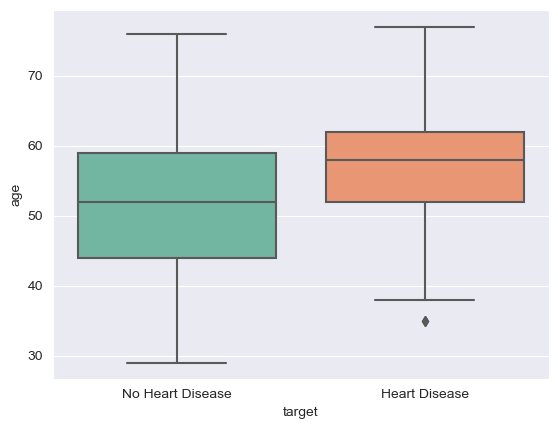

In [45]:
sns.boxplot(data=df2,x='target',y='age')

<AxesSubplot:xlabel='cp', ylabel='thalach'>

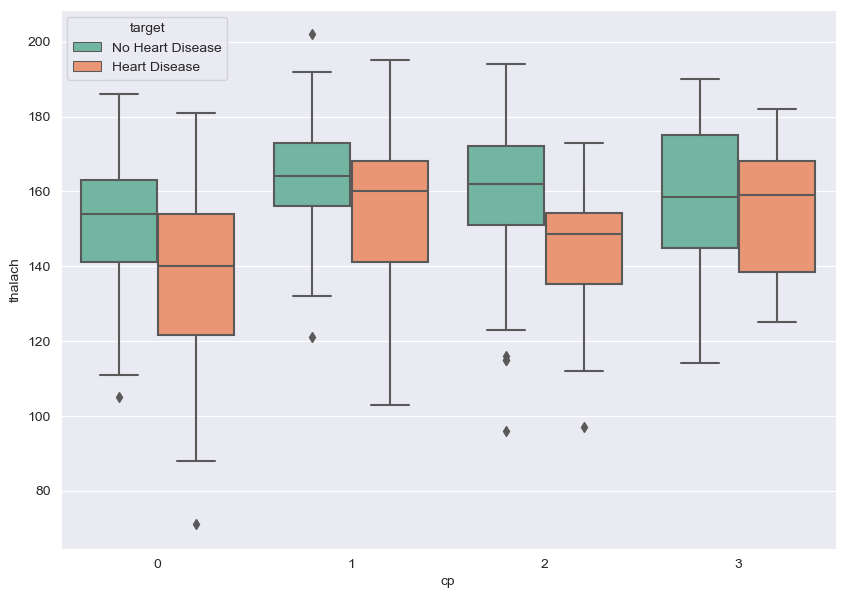

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

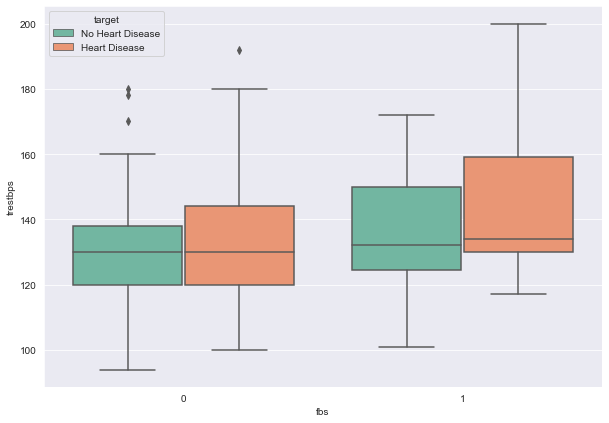

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

<AxesSubplot:xlabel='slope', ylabel='thalach'>

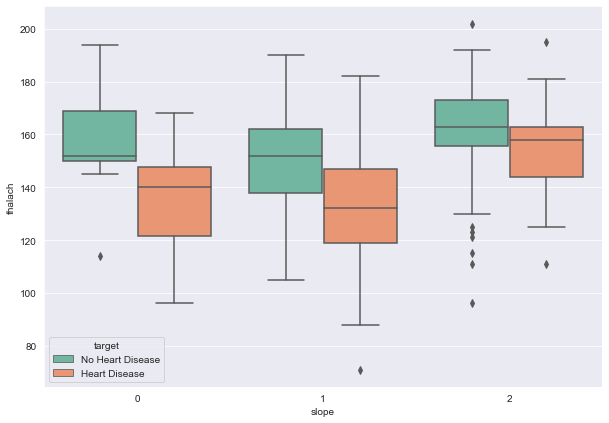

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

#### 5. Violin plot

<AxesSubplot:xlabel='ca', ylabel='age'>

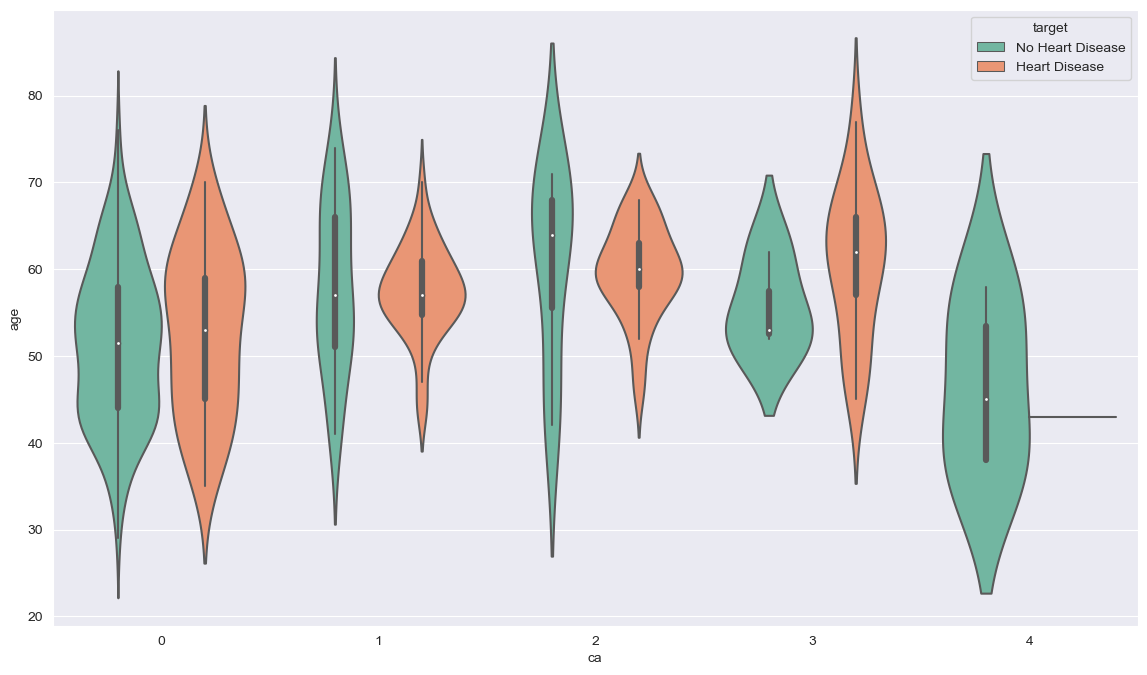

In [47]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

<AxesSubplot:xlabel='exang', ylabel='oldpeak'>

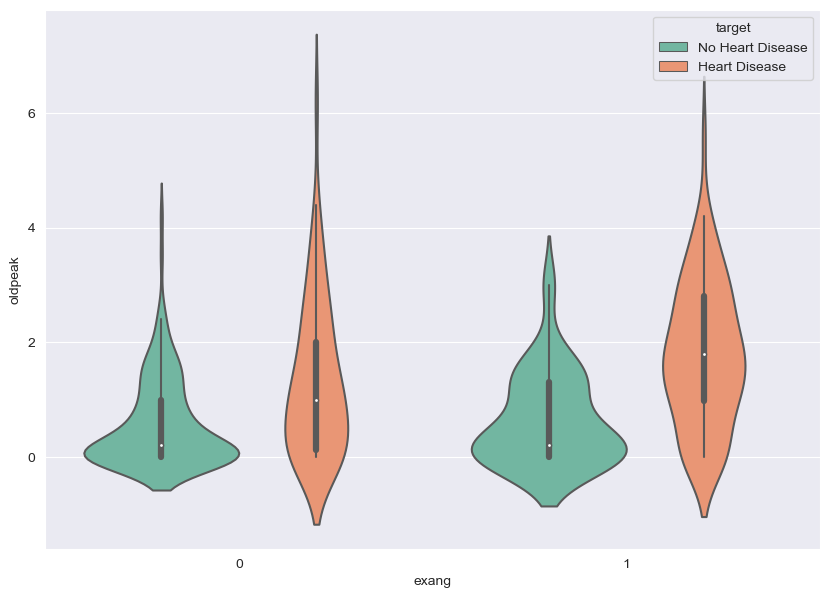

In [48]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

<AxesSubplot:xlabel='thal', ylabel='oldpeak'>

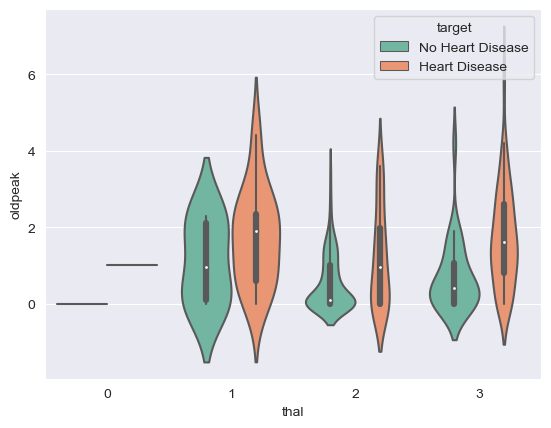

In [49]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

<AxesSubplot:xlabel='target', ylabel='thalach'>

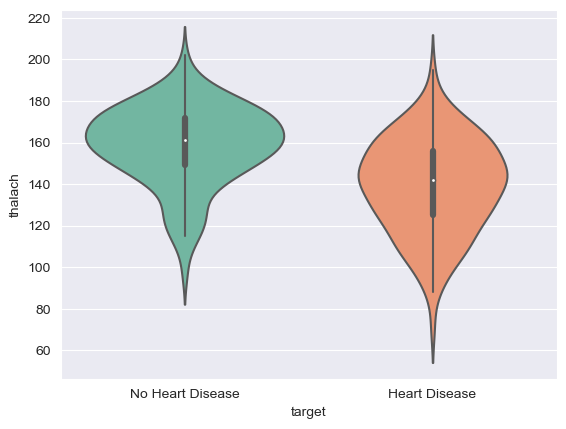

In [50]:
sns.violinplot(data=df2,x='target',y='thalach')

#### 6. Cluster Map

<Figure size 2000x500 with 0 Axes>

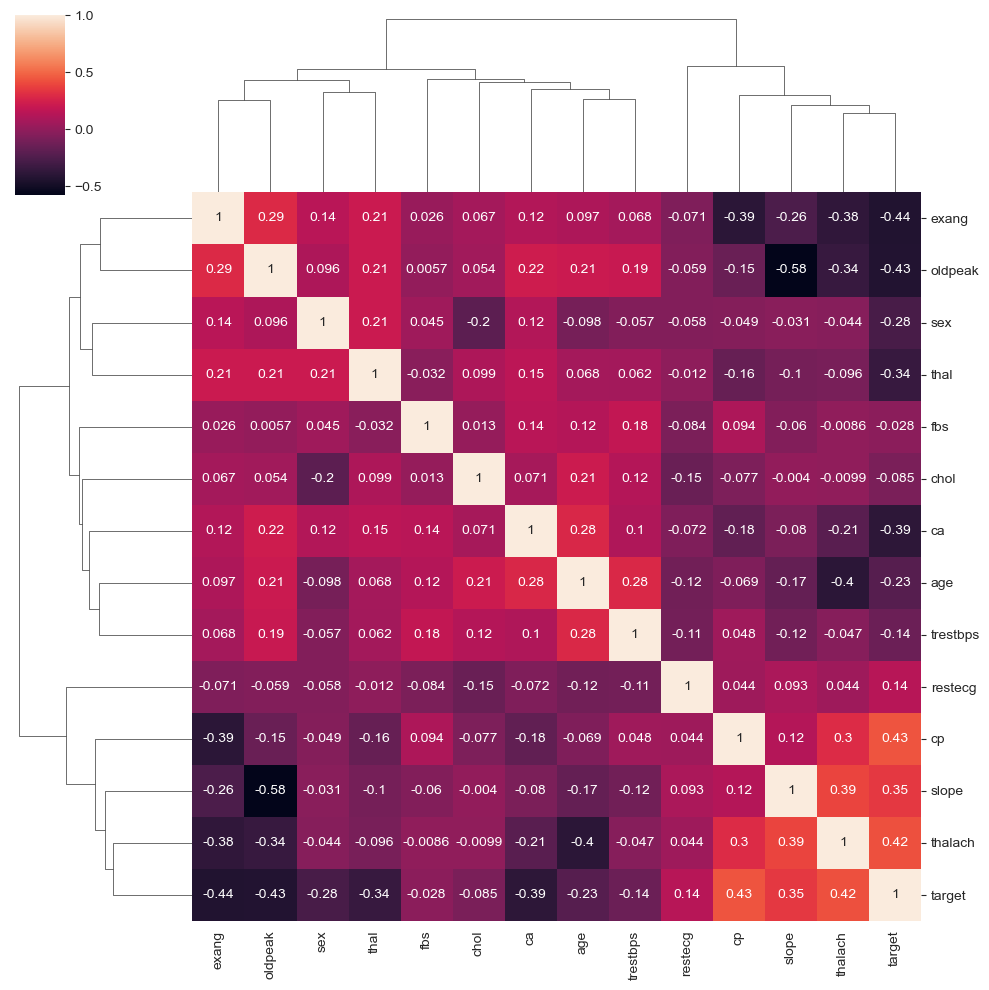

In [51]:
plt.figure(figsize=(20,5))
sns.clustermap(df.corr(),annot=True)
plt.savefig("Images/Heatmap.png")

#### 7. Pairplot

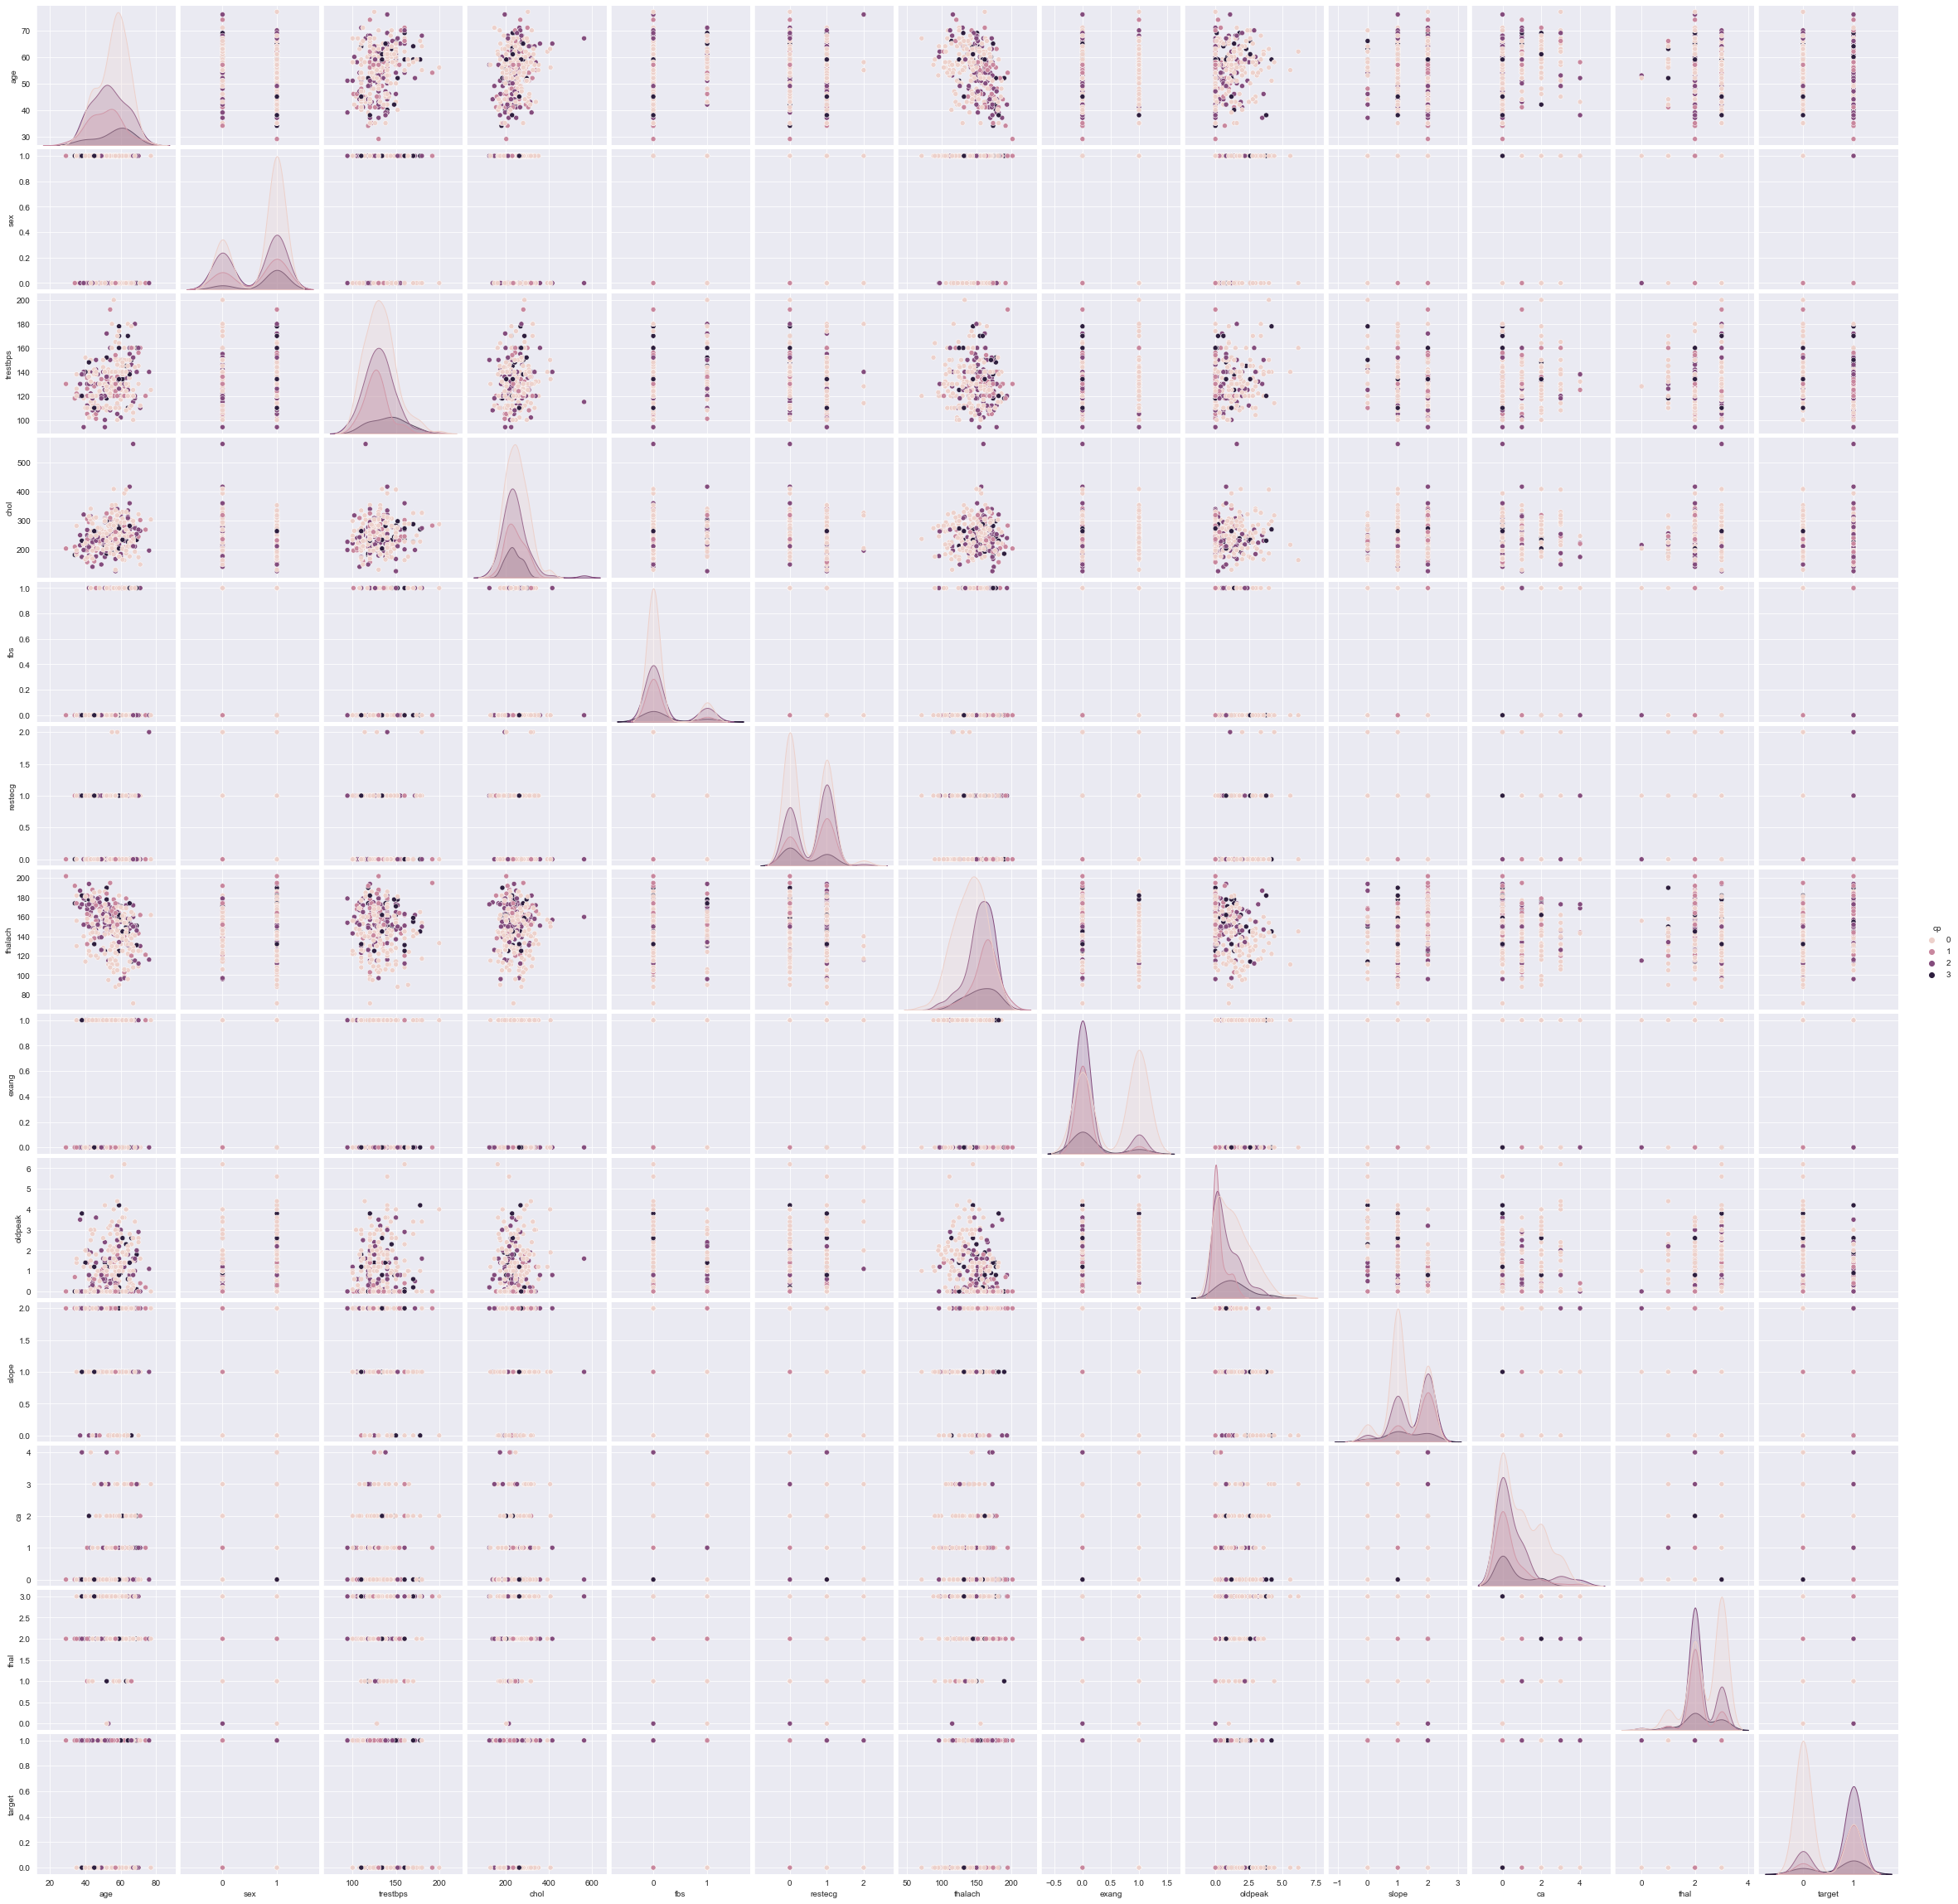

In [74]:
sns.pairplot(df, hue='cp')

In [65]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
              'rest_ecg_type', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope_type', 
              'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [66]:
df4 = df[df['target'] == 0 ][['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']] 
       
#target 0 - people with heart disease

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Density'>

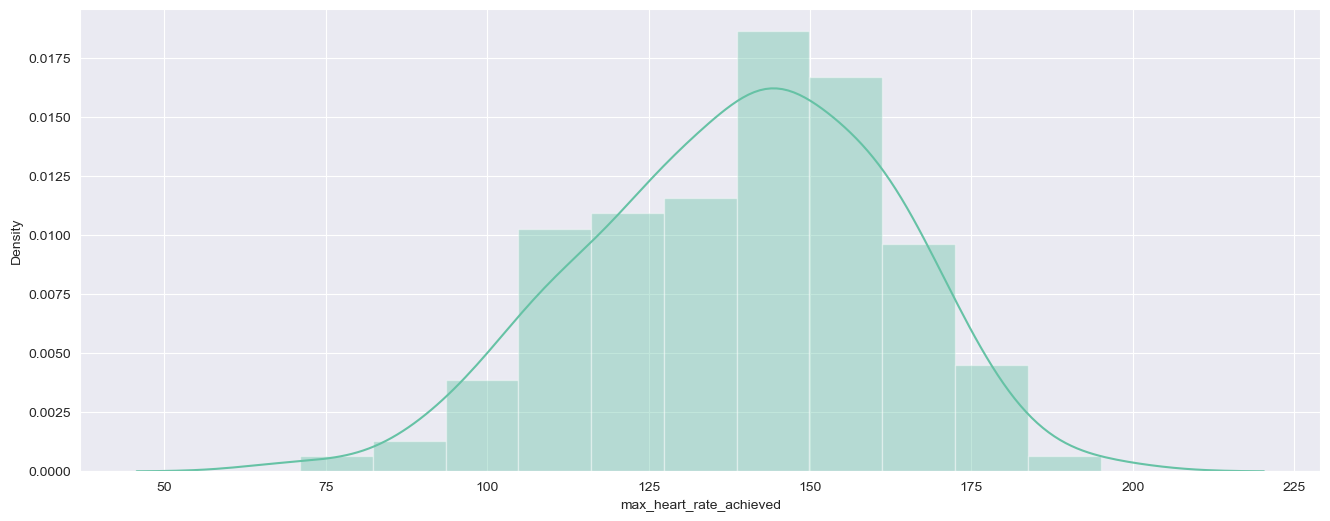

In [70]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate_achieved'])

Normal Heart rate is found to be between 60 and 100 bpm. Some areas of cardiac muscles will start to die during a Heart Attack because of Lack of Blood. A person’s pulse may become slower (bradycardia) or faster (tachycardiac) depending on the type of Heart Attack they are experiencing.

Heart Diseased Patients visualization

<AxesSubplot:xlabel='rest_ecg_type', ylabel='cholesterol'>

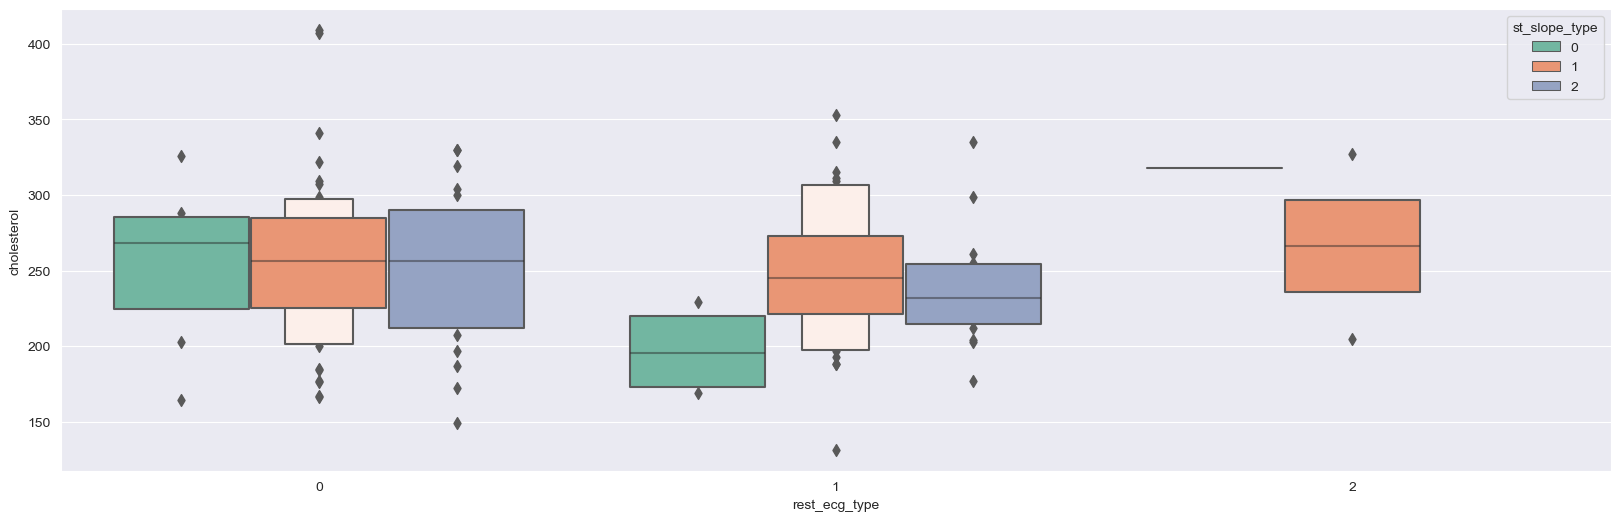

In [71]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='rest_ecg_type',y='cholesterol',hue='st_slope_type')

In normal type of rest ECG proves to be important for the prediction model along with the down sloping ST slope. The patient composed of these two features usually has cholesterol level between 170 to 225 mg/dl. The other types of slops with the rest ECG seems to be more spread out and less concise.

<AxesSubplot:xlabel='chest_pain_type', ylabel='max_heart_rate_achieved'>

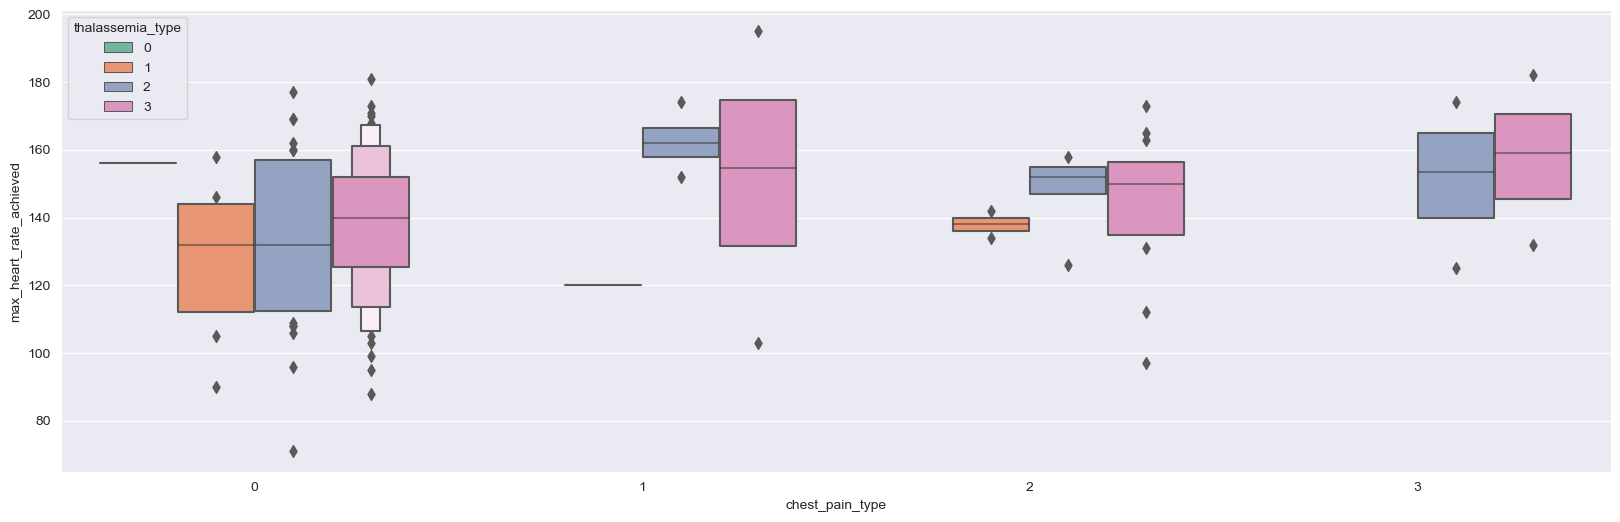

In [72]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='chest_pain_type',y='max_heart_rate_achieved',hue='thalassemia_type')

## 4. Data Pre-processing
In this module, we will preprocess the dataset for modeling purporse

In [73]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### 4.1 Change Name of the column

For the given dataset, we have 4 Categorical Variables and rest are Numerical Values
1. cp - chest_pain_type
2. restecg - rest_ecg_type
3. slope - st_slope_type
4. thal - thalassemia_type

In [74]:
# Unique values in categorical values
list = []
cols = ['chest_pain_type', 'rest_ecg_type', 'st_slope_type', 'thalassemia_type']
for i in cols:
    uniq_val_cat = len(df[i].unique())
    print("Column:",i)
    print(df[i].unique())
    list.append(uniq_val_cat)

# Printing unique values for the selected columns
df_uni_val_cat = pd.DataFrame({'columns': cols, 'unique_values': list})
df_uni_val_cat

Column: chest_pain_type
[3 2 1 0]
Column: rest_ecg_type
[0 1 2]
Column: st_slope_type
[0 2 1]
Column: thalassemia_type
[1 2 3 0]


,columns,unique_values
0,chest_pain_type,4
1,rest_ecg_type,3
2,st_slope_type,3
3,thalassemia_type,4


#### Converting Numerical Values to Categorical Values

In [77]:
df_prep = df.copy()
df_prep.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
# cp - chest_pain_type
df_prep.loc[df_prep['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df_prep.loc[df_prep['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df_prep.loc[df_prep['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df_prep.loc[df_prep['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

# restecg - rest_ecg_type
df_prep.loc[df_prep['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df_prep.loc[df_prep['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df_prep.loc[df_prep['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

# slope - st_slope_type
df_prep.loc[df_prep['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df_prep.loc[df_prep['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df_prep.loc[df_prep['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

# thal - thalassemia_type
df_prep.loc[df_prep['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df_prep.loc[df_prep['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df_prep.loc[df_prep['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df_prep.loc[df_prep['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [79]:
df_prep.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,1,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1


### 4.2 One Hot Encoding

In [84]:
data = pd.get_dummies(df_prep, drop_first=False)
data.head(10)

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,1,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,1,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,1,0,0
5,57,1,140,192,0,148,0,0.4,0,1,...,0,0,1,0,1,0,1,0,0,0
6,56,0,140,294,0,153,0,1.3,0,1,...,0,1,0,0,1,0,0,1,0,0
7,44,1,120,263,0,173,0,0.0,0,1,...,0,0,1,0,0,1,0,0,0,1
8,52,1,172,199,1,162,0,0.5,0,1,...,0,0,1,0,0,1,0,0,0,1
9,57,1,150,168,0,174,0,1.6,0,1,...,0,0,1,0,0,1,0,1,0,0


In [85]:
df_temp = data['thalassemia_type_fixed defect']
df_temp

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    0
301    0
302    0
Name: thalassemia_type_fixed defect, Length: 303, dtype: uint8

Since one hot encoding dropped "thalassemia_type_fixed defect" column which was a useful column compared to 'thalassemia_type_nothing' which is a null column, we dropped 'thalassemia_type_nothing' and concatinated 'thalassemia_type_fixed defect'

In [86]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,1,0,0,1,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,1,0,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,1,0,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,1,0,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,1,0,1,0,0,0


In [87]:
result.drop('thalassemia_type_nothing', axis=1, inplace=True)
resultc = result.copy()
resultc.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,1,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,1,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,1,0,0


## 5. Modeling - Machine Learning

## Feature Selection

### 1. Univariate Selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.

`For regression: f_regression, mutual_info_regression`

`For classification: chi2, f_classif, mutual_info_classif`

The following example uses the `chi-squared` (chi2) statistical test, and `f_classif` for non-negative features to select 10 of the best features.

In [89]:
# Importing Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# Creating a copy of the dataset
data_feat_sel = df.copy()

# Predictor Variable
X = data_feat_sel.iloc[:,0:13]
# target variable
y = data_feat_sel.iloc[:,13:14]

def func(score_function):
    bestfeatures = SelectKBest(score_func = score_function, k = 10)
    features = bestfeatures.fit(X,y)
    scores_data = pd.DataFrame(features.scores_)
    columns = pd.DataFrame(X.columns)
    
    top_features = pd.concat([columns, scores_data], axis=1)
    top_features.columns = ['Variable','feature_Score']
    print("While using ",score_function,"the top features are:\n")
    return print(top_features.sort_values(by ='feature_Score', ascending=False), "\n") 

# calling the function
func(chi2)
func(f_classif)

While using  <function chi2 at 0x7ff2299c3160> the top features are:

                   Variable  feature_Score
7   max_heart_rate_achieved     188.320472
9             st_depression      72.644253
11        num_major_vessels      66.440765
2           chest_pain_type      62.598098
8   exercise_induced_angina      38.914377
4               cholesterol      23.936394
0                       age      23.286624
3    resting_blood_pressure      14.823925
10            st_slope_type       9.804095
1                       sex       7.576835
12         thalassemia_type       5.791853
6             rest_ecg_type       2.978271
5       fasting_blood_sugar       0.202934 

While using  <function f_classif at 0x7ff2299c3040> the top features are:

                   Variable  feature_Score
8   exercise_induced_angina      70.952438
2           chest_pain_type      69.772271
9             st_depression      68.551439
7   max_heart_rate_achieved      65.120104
11        num_major_vessels      54.

### 2. Feature Importance
Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.

`Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.`

age                        0.072365
sex                        0.056014
chest_pain_type            0.134616
resting_blood_pressure     0.061142
cholesterol                0.058658
fasting_blood_sugar        0.019652
rest_ecg_type              0.036732
max_heart_rate_achieved    0.085155
exercise_induced_angina    0.100207
st_depression              0.083489
st_slope_type              0.066203
num_major_vessels          0.119485
thalassemia_type           0.106283
dtype: float64


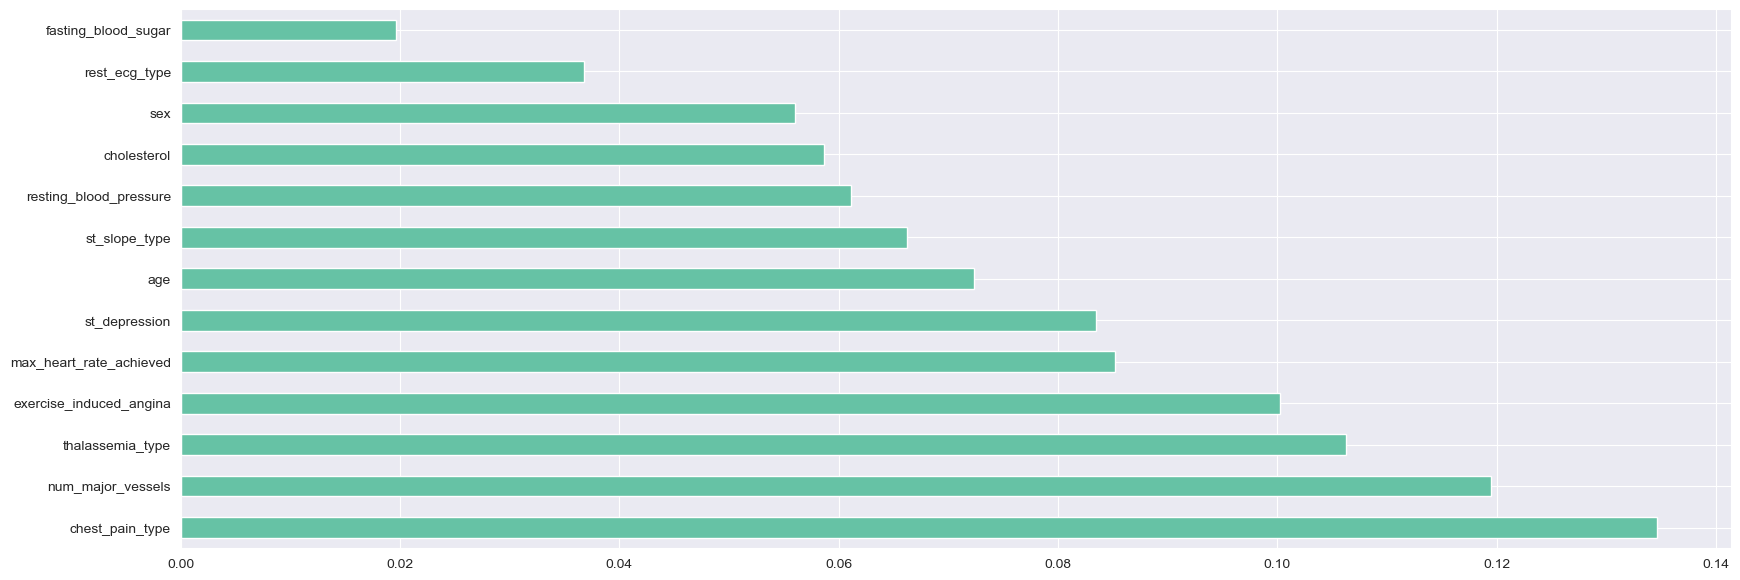

In [90]:
from sklearn.ensemble import ExtraTreesClassifier

#use inbuilt class feature_importances of tree based classifiers
feat_imp = ExtraTreesClassifier()
feat_imp.fit(X,y)

#plot graph of feature importances for better visualization
top_feat_importances = pd.Series(feat_imp.feature_importances_, index=X.columns)
print(top_feat_importances)
top_feat_importances.nlargest(13).plot(kind='barh', figsize = (20,7))
plt.show()

In [103]:
# selecting top features with value greater than 0.05
top_feat_importances.values > 0.05

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True])

### 3. Correlation Matrix Using Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)

Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

<AxesSubplot:>

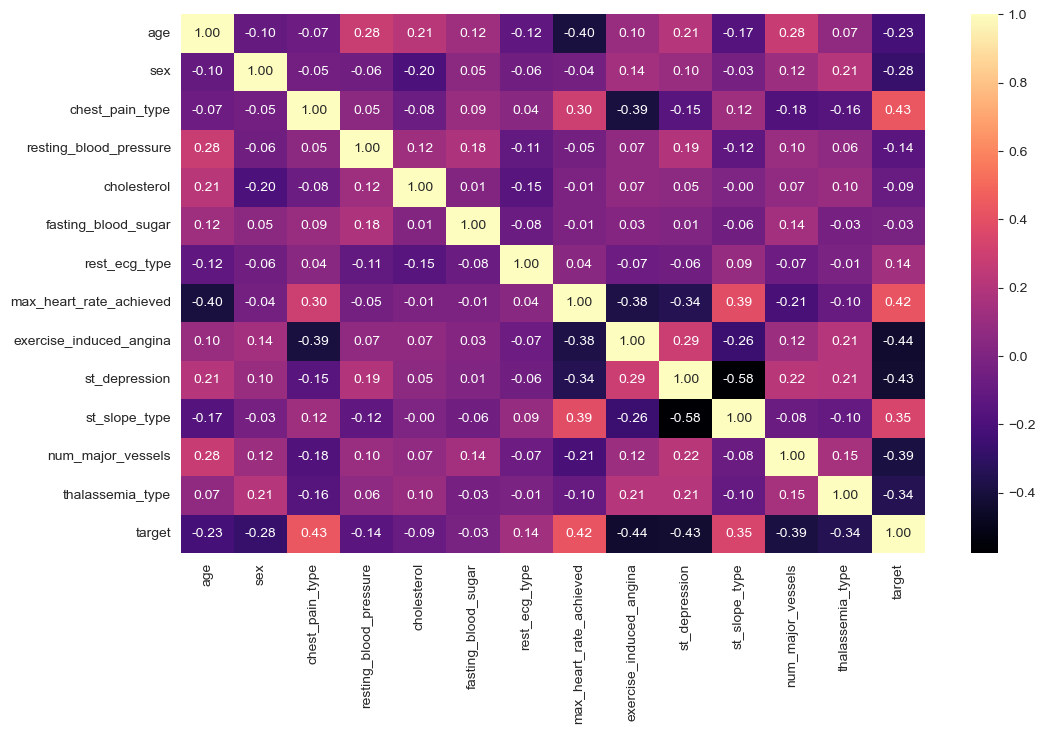

In [92]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

#### Finding the Number of unique values in each column

In [93]:
list = []
for i in df.columns:
    uni_val = len(df[i].unique())
    list.append(uni_val)

df_uniq_val = pd.DataFrame({'column':df.columns, 'unique_val':list})
df_uniq_val

,column,unique_val
0,age,41
1,sex,2
2,chest_pain_type,4
3,resting_blood_pressure,49
4,cholesterol,152
5,fasting_blood_sugar,2
6,rest_ecg_type,3
7,max_heart_rate_achieved,91
8,exercise_induced_angina,2
9,st_depression,40


## Machine Learning Implementation

### 1. Classification Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import accuracy_score

# Predictor Variables
X = df.iloc[:,0:13]
# Target Variables
y = df.iloc[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [126]:
# Create Decision Tree classifer object
Decision_tree_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
Decision_tree_model_fit = Decision_tree_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = Decision_tree_model_fit.predict(X_test)
y_test_pred = Decision_tree_model_fit.predict(X_train)

print("Training Accuracy:", metrics.accuracy_score(y_train, y_test_pred)*100)
print("Testing Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)

Training Accuracy: 100.0
Testing Accuracy: 72.52747252747253


#### Decision Tree with `Entropy` as the criteria

In [127]:
# Create Decision Tree classifer object
Decision_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
Decision_tree_model_fit = Decision_tree_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = Decision_tree_model_fit.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)

Accuracy: 76.92307692307693


### 2. Logistic Regression

In [128]:
result.sample(10)

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
233,64,1,120,246,0,96,1,2.2,1,0,...,0,1,0,1,0,0,0,1,0,0
92,52,1,138,223,0,169,0,0.0,4,1,...,0,0,1,0,0,1,0,1,0,0
199,65,1,110,248,0,158,0,0.6,2,0,...,0,1,0,0,0,1,1,0,0,1
278,58,0,136,319,1,152,0,0.0,2,0,...,0,1,0,0,0,1,0,1,0,0
59,57,0,128,303,0,159,0,0.0,1,1,...,0,1,0,0,0,1,0,1,0,0
141,43,1,115,303,0,181,0,1.2,0,1,...,0,0,1,0,1,0,0,1,0,0
169,53,1,140,203,1,155,1,3.1,0,0,...,0,1,0,1,0,0,0,0,1,0
75,55,0,135,250,0,161,0,1.4,0,1,...,0,1,0,0,1,0,0,1,0,0
302,57,0,130,236,0,174,0,0.0,1,0,...,0,1,0,0,1,0,0,1,0,0
81,45,1,128,308,0,170,0,0.0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [347]:
print(result.columns)

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')


#### 2.1 Normalization

<p align = 'center'><img src = "https://miro.medium.com/max/1400/0*k_w3tvviIMw62syi.png" width="700" height="200"></p>

#### Method 1: Manaully Normalizing the dataset

In [129]:
result_normal=(result-np.min(result))/(np.max(result)-np.min(result)).values
result_normal.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### Method 2: Normalizing using Library

In [130]:
# Normalize the data on original data
from sklearn.preprocessing import Normalizer

normalised_model = Normalizer()
transformer = normalised_model.fit(result)
normised_model = transformer.transform(result)
#normised_model = np.round(normised_model, 3)

normalised_result_data = pd.DataFrame(normised_model, columns = result.columns)
normalised_result_data

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,0.197458,0.003134,0.454467,0.730281,0.003134,0.470138,0.000000,0.007209,0.000000,0.003134,...,0.0,0.003134,0.000000,0.003134,0.000000,0.000000,0.003134,0.000000,0.000000,0.003134
1,0.108750,0.002939,0.382095,0.734798,0.000000,0.549629,0.000000,0.010287,0.000000,0.002939,...,0.0,0.000000,0.002939,0.002939,0.000000,0.000000,0.000000,0.002939,0.000000,0.000000
2,0.136828,0.000000,0.433845,0.680802,0.000000,0.574010,0.000000,0.004672,0.000000,0.003337,...,0.0,0.003337,0.000000,0.000000,0.000000,0.003337,0.000000,0.003337,0.000000,0.000000
3,0.172883,0.003087,0.370465,0.728580,0.000000,0.549522,0.000000,0.002470,0.000000,0.003087,...,0.0,0.000000,0.003087,0.000000,0.000000,0.003087,0.000000,0.003087,0.000000,0.000000
4,0.138433,0.000000,0.291437,0.859739,0.000000,0.395869,0.002429,0.001457,0.000000,0.002429,...,0.0,0.000000,0.002429,0.000000,0.000000,0.002429,0.000000,0.002429,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.183905,0.000000,0.451697,0.777565,0.000000,0.396848,0.003226,0.000645,0.000000,0.000000,...,0.0,0.000000,0.003226,0.000000,0.003226,0.000000,0.000000,0.000000,0.003226,0.000000
299,0.141420,0.003143,0.345694,0.829666,0.000000,0.414833,0.000000,0.003771,0.000000,0.000000,...,0.0,0.000000,0.003143,0.000000,0.003143,0.000000,0.000000,0.000000,0.003143,0.000000
300,0.236729,0.003481,0.501309,0.671893,0.003481,0.490865,0.000000,0.011836,0.006963,0.000000,...,0.0,0.000000,0.003481,0.000000,0.003481,0.000000,0.000000,0.000000,0.003481,0.000000
301,0.253538,0.004448,0.578244,0.582692,0.000000,0.511523,0.004448,0.005338,0.004448,0.000000,...,0.0,0.000000,0.004448,0.000000,0.004448,0.000000,0.000000,0.000000,0.004448,0.000000


#### 2.2 Standard Scaler

In [131]:
## Standard Scaler on X_train data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(result)
scaled_data = scaler.transform(result)
scaled_data = np.round(scaled_data,3)

scaled_result_data = pd.DataFrame(scaled_data, columns = result.columns)
scaled_result_data

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,0.952,0.681,0.764,-0.256,2.394,0.015,-0.697,1.087,-0.714,0.915,...,-0.116,1.030,-1.003,3.665,-0.927,-0.939,3.979,-1.101,-0.793,3.979
1,-1.915,0.681,-0.093,0.072,-0.418,1.633,-0.697,2.123,-0.714,0.915,...,-0.116,-0.971,0.997,3.665,-0.927,-0.939,-0.251,0.908,-0.793,-0.251
2,-1.474,-1.468,-0.093,-0.817,-0.418,0.978,-0.697,0.311,-0.714,0.915,...,-0.116,1.030,-1.003,-0.273,-0.927,1.065,-0.251,0.908,-0.793,-0.251
3,0.180,0.681,-0.664,-0.198,-0.418,1.240,-0.697,-0.207,-0.714,0.915,...,-0.116,-0.971,0.997,-0.273,-0.927,1.065,-0.251,0.908,-0.793,-0.251
4,0.290,-1.468,-0.664,2.082,-0.418,0.584,1.435,-0.379,-0.714,0.915,...,-0.116,-0.971,0.997,-0.273,-0.927,1.065,-0.251,0.908,-0.793,-0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290,-1.468,0.478,-0.102,-0.418,-1.165,1.435,-0.724,-0.714,-1.093,...,-0.116,-0.971,0.997,-0.273,1.079,-0.939,-0.251,-1.101,1.261,-0.251
299,-1.033,0.681,-1.235,0.343,-0.418,-0.772,-0.697,0.138,-0.714,-1.093,...,-0.116,-0.971,0.997,-0.273,1.079,-0.939,-0.251,-1.101,1.261,-0.251
300,1.504,0.681,0.707,-1.029,2.394,-0.378,-0.697,2.036,1.245,-1.093,...,-0.116,-0.971,0.997,-0.273,1.079,-0.939,-0.251,-1.101,1.261,-0.251
301,0.290,0.681,-0.093,-2.228,-0.418,-1.515,1.435,0.138,0.265,-1.093,...,-0.116,-0.971,0.997,-0.273,1.079,-0.939,-0.251,-1.101,1.261,-0.251


#### Implementing `Logistic Regression` on "Original Data"

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seperating predictor variable and target variable
X = result.drop('target', axis = 1)
y = result['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logre = LogisticRegression()
logre.fit(X_train, y_train)

#X_test.fillna('0', inplace=True)
y_pred_original = logre.predict(X_test)

# Accuracy of the model for Original Data
print("Testing accuracy:",round(accuracy_score(y_test,y_pred_original)*100,3),"%")

Testing accuracy: 88.525 %


#### Implementing `Logistic Regression` on "Normalised Data"

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seperating predictor variable and target variable
X = result_normal.drop('target', axis = 1)
y = result_normal['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_re = LogisticRegression()
log_re.fit(X_train, y_train)

#X_test.fillna('0', inplace=True)
y_pred_normalised = log_re.predict(X_test)

# Accuracy for the model for Normalised data
print(round(accuracy_score(y_test,y_pred_normalised)*100, 3),"%")

85.246 %


#### Implementing `Logistic Regression` on "Scaled Data"

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seperating predictor variable and target variable
X = scaled_result_data.drop('target', axis = 1)
y = result_normal['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_re = LogisticRegression()
log_re.fit(X_train, y_train)

#X_test.fillna('0', inplace=True)
y_pred_normalised = log_re.predict(X_test)

# Accuracy for the model for Normalised data
print(round(accuracy_score(y_test,y_pred_normalised)*100, 3),"%")

90.164 %


In [427]:
dic = pd.DataFrame({'Actual':y_test,'Prediction_Original': y_pred_original, 'Prediction_Normalised': y_pred_normalised})
dic

,Actual,Prediction_Original,Prediction_Normalised
225,0.0,0,0.0
152,1.0,1,0.0
228,0.0,0,0.0
201,0.0,0,0.0
52,1.0,0,0.0
...,...,...,...
146,1.0,1,1.0
302,0.0,1,1.0
26,1.0,1,1.0
108,1.0,1,1.0


In [158]:
logre.coef_.ravel()

array([ 0.01091972, -0.82095365, -0.00949127, -0.0011308 ,  0.16619467,
        0.01928492, -0.78665715, -0.52500136, -0.69867174, -0.95767232,
       -0.02941163,  0.68446108,  0.319145  , -0.00356937, -0.29224206,
        0.31233356, -0.0185505 , -0.37443242,  0.40950505,  0.04698458,
        0.71631504, -0.77905672,  0.04698458])

In [170]:
print(logre.intercept_)
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.01449798]


,Coeffecient
thalassemia_type_normal,0.716315
chest_pain_type_non-anginal pain,0.684461
st_slope_type_upsloping,0.409505
chest_pain_type_typical angina,0.319145
rest_ecg_type_normal,0.312334
fasting_blood_sugar,0.166195
thalassemia_type_fixed defect,0.046985
thalassemia_type_fixed defect,0.046985
max_heart_rate_achieved,0.019285
age,0.010920


## 6. Performance Evaluation

#### 6.1 Classification Report

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_original))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        29
         1.0       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



#### 6.2 Confusion Matrix

[[27  2]
 [ 5 27]]


<AxesSubplot:>

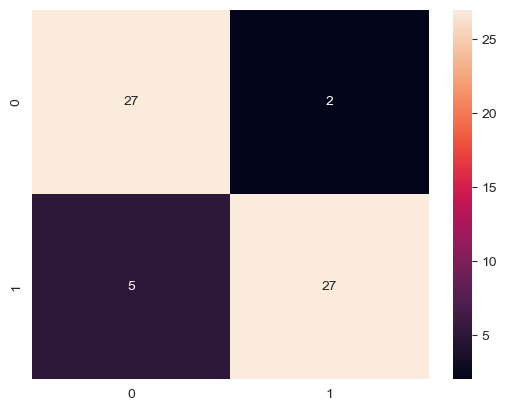

In [173]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_original))
sns.heatmap(confusion_matrix(y_test,y_pred_original),annot=True)

#### 6.3 ROC Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

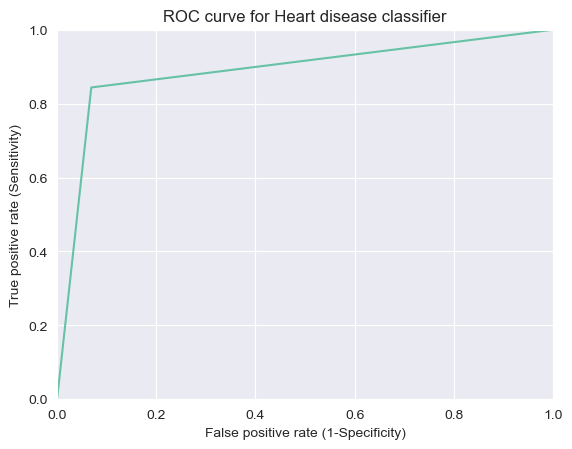

In [175]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_original)
plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.savefig("Images/aucroc_curve.png")

In [176]:
# Roc_Auc Score
from sklearn.metrics import roc_auc_score as roc_score

print(round(roc_score(y_test,y_pred_original)*100, 3),"%")

88.739 %


## 7. Conclusion


*  The Area under the ROC curve is 88.181% which is somewhat satisfactory.
*  The model predicted with 86.88% accuracy. The model is more specific than sensitive.
*  According to this model the major features contributing in precision of predciting model are shown in the heatmap in order.

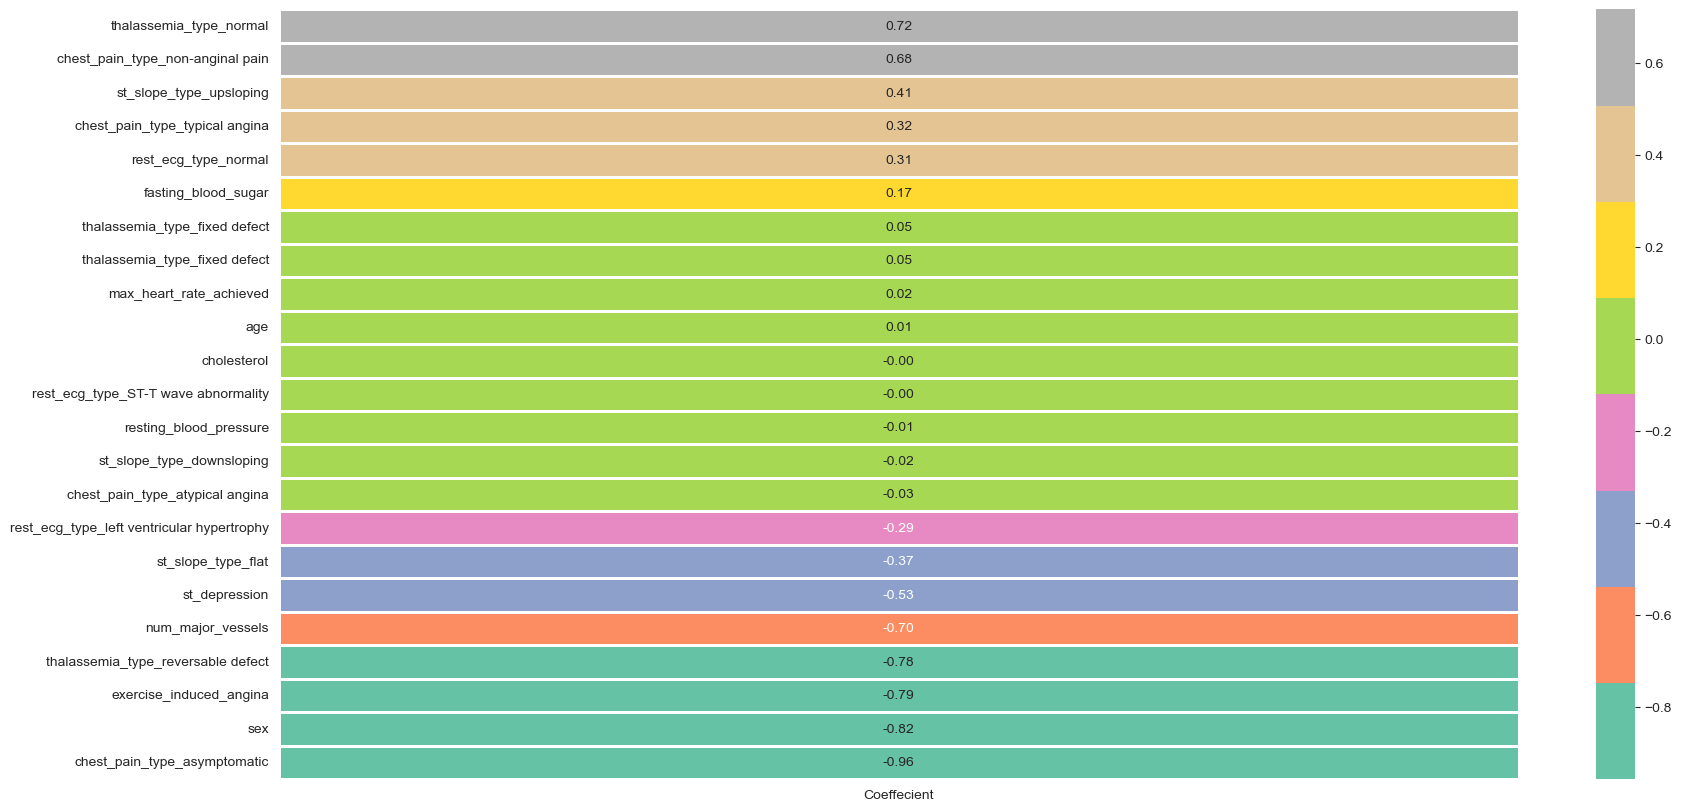

In [182]:
plt.figure(figsize=(20,10))
sns.heatmap(coeffecients, annot=True, fmt='.2f', cmap='Set2', linewidths=1)
plt.savefig("Images/Log_Reg_Coeffecients.png")

The important features contributing to the accuracy of the prediction are shown through the Heatmap in descending order. In silver color code, the most contributing feature, the chest pain types and maximum heart rate achieved proved to be more valuable by `0.81` to `0.64` units.